# **Project name- Bike demand prediction**

# **Problem Statement**

Almost all metropolitian cities have number of rentak bike services which play an important role in transportation. Ensuring timely access of rental bikes is extremely neccessary for satistfaction of customers. This could be a business with huge profits if there is a proper maanagement and techniques. Bikes can be rented from one station and can be returned at other station or the same station itself. Membership policies can be given to customers on monthly basis based on the customer demand. Knowing the number of bikes required by the customers  beforehand helps in timely allocation of bikes and maximisation of the profits with the available resources itself.In this perspective, supervised machine algorithms can be used to know the demand of rental bikes beforehand itself based on other parameters like season, session, day and availablity of holidays and make neccesary arrangements.   

# **Business Objective**

Ensuring the timely access to rental bikes is neccessary and having more number of bikes when not neccessary and when it is required having no bikes in stock is of no use. So in order to predict the demand in the rentals bikes based on other parameters is the prime objective of this project.

## Import libraries

In [ ]:
# Import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries used to pre-process
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


# libraries used to implement models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# libraries to evaluate performance
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

## Dataset loading

In [ ]:
# Copy the path of the dataset and load the dataset
path ='/content/SeoulBikeData.xlsx'
bike_data= pd.read_excel(path)

## Dataset First view

In [ ]:
# Displays the topmost five rows of the dataset
bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Displays the bottom most five rows of the dataset
bike_data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# Displays the 3 random rows of the dataset
bike_data.sample(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3437,2018-04-23,6,5,9.2,95,2.3,404,8.4,0.00,2.5,0.0,Spring,No Holiday,Yes
7818,2018-10-22,2613,18,17.3,43,0.9,783,4.5,0.08,0.0,0.0,Autumn,No Holiday,Yes
2914,2018-04-01,566,10,14.7,61,2.0,945,7.2,0.64,0.0,0.0,Spring,No Holiday,Yes


## Dataset rows and columns count

In [ ]:
# Displays the number of rows and columns in the dataset respectively.
bike_data.shape
print(f'The number of rows and columns in given dataset are {bike_data.shape[0]} and {bike_data.shape[1]} respectively')

The number of rows and columns in given dataset are 8760 and 14 respectively


## Dataset information

In [ ]:
# Displays the columns present in the dataset
print(f'The columns of the dataset are {bike_data.columns}')

The columns of the dataset are Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


These are the various columns present in the dataset.

In [ ]:
# Displays the general information on the dataset
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
# Displays the statistical information of the dataset
bike_data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


## Missing values and outliers detection

In [ ]:
# Check for the presence of any missing values
bike_data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There are no missing values present in the dataset

In [ ]:
#Check for any duplicate values
bike_data.duplicated().sum()

0

There are no duplicated values as well in the dataset

<Axes: >

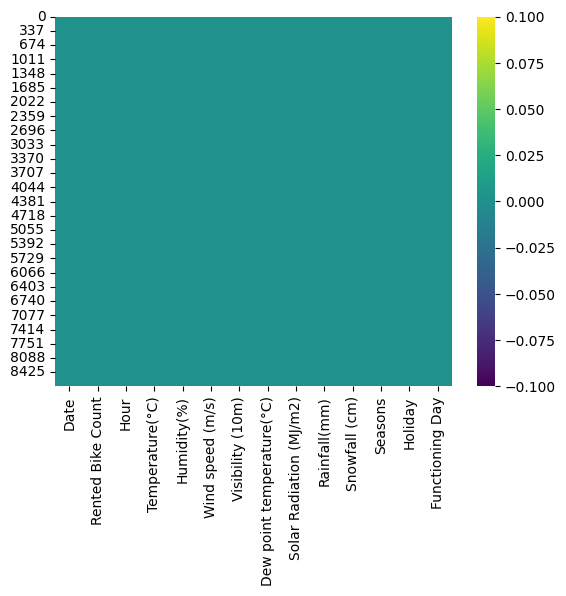

In [ ]:
# Heatmap for the presence of any null values
sns.heatmap(bike_data.isnull(), cmap='viridis')

It is evident from the heatmap that there are no missing values

In [ ]:
# Displays the number of unique values of each variable or column
for i in bike_data.columns.tolist():
  print(f'Number of unique values of {i} are {bike_data[i].nunique()} ')

Number of unique values of Date are 365 
Number of unique values of Rented Bike Count are 2166 
Number of unique values of Hour are 24 
Number of unique values of Temperature(°C) are 546 
Number of unique values of Humidity(%) are 90 
Number of unique values of Wind speed (m/s) are 65 
Number of unique values of Visibility (10m) are 1789 
Number of unique values of Dew point temperature(°C) are 556 
Number of unique values of Solar Radiation (MJ/m2) are 345 
Number of unique values of Rainfall(mm) are 61 
Number of unique values of Snowfall (cm) are 51 
Number of unique values of Seasons are 4 
Number of unique values of Holiday are 2 
Number of unique values of Functioning Day are 2 


Looking at the number of unique values of variables, it can be concluded that there are numerical variables and categorical variables as well

In [ ]:
# Rename the columns of the dataset as neccessary for the convenience
bike_data=bike_data.rename(columns={'Rented Bike Count':'rented_bike_count',
                                'Date':'date',
                                'Hour':'hour',
                                'Seasons':'seasons',
                                'Holiday':'holiday',
                                'Temperature(°C)':'temperature',
                                'Humidity(%)':'humidity',
                                'Wind speed (m/s)':'wind_speed',
                                'Visibility (10m)':'visibility',
                                'Dew point temperature(°C)':'dew_point_temp',
                                'Solar Radiation (MJ/m2)':'solar_radiation',
                                'Rainfall(mm)':'rainfall',
                                'Snowfall (cm)':'snowfall',
                                'Functioning Day':'functioning_day'})


Column names were renamed as per the the convenience for handling.

In [ ]:
# Extract the date, month, year and day_name from the column 'day'
bike_data['day']=bike_data['date'].dt.day
bike_data['month']=bike_data['date'].dt.month
bike_data['year']=bike_data['date'].dt.year
bike_data['weekday']=bike_data['date'].dt.day_name()

day, month, year and date were extracted from the available date column.

In [ ]:
bike_data.drop('date',axis=1,inplace=True)

In [ ]:
def session(num_hours):
  if num_hours>4 and num_hours<=8:
        return 'Early Morning'
  elif num_hours>8 and num_hours<=12:
        return 'Morning'
  elif num_hours>12 and num_hours<=16:
        return 'Afternoon'
  elif num_hours>16 and num_hours<=20:
        return 'Evening'
  elif num_hours>20 and num_hours<=24:
        return 'Night'
  elif num_hours<=4:
        return 'Late Night'
bike_data['session']=bike_data['hour'].apply(session)
bike_data['session'].value_counts()

Late Night       1825
Early Morning    1460
Morning          1460
Afternoon        1460
Evening          1460
Night            1095
Name: session, dtype: int64

Function session was created for classifying the session as early morning, morning, afternoon, evening, night and late night.

<Axes: >

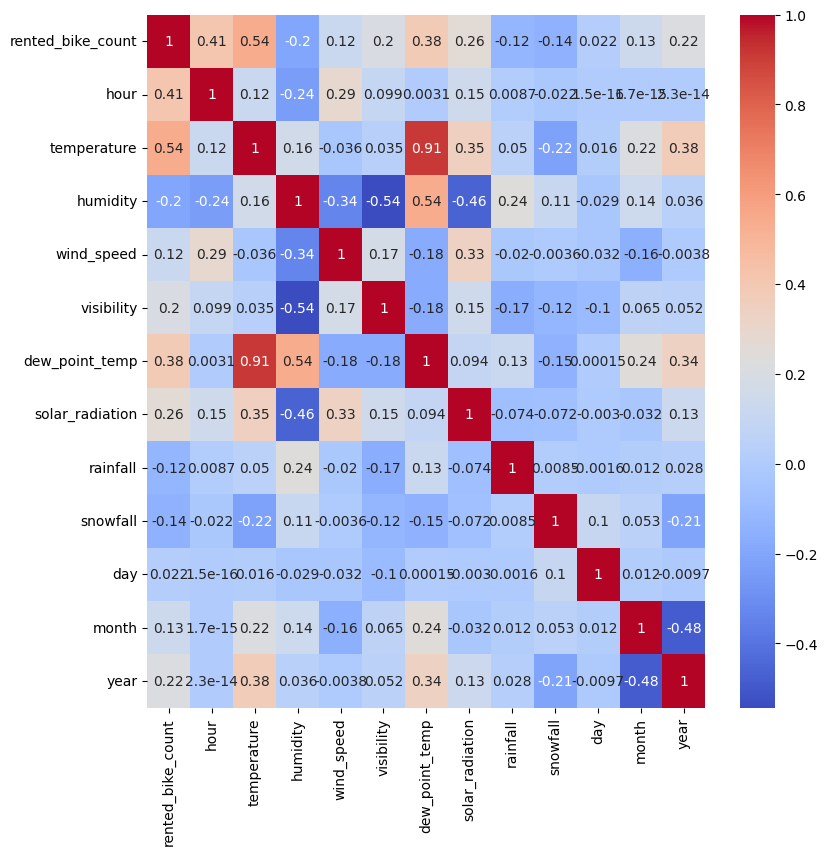

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(bike_data.corr(), annot=True,cmap='coolwarm')

Rented bike count was negatively correlated with snowfall, rainfall and humidity however it remained correlated with other variables.

In [ ]:
bike_data.drop(['dew_point_temp'],axis=1, inplace=True)

Temperature and Dew point temperature were found to be highly correlated hence dew point temperature was removed from dataset.

In [ ]:
numerical_features=[]
categorical_features=[]
for column in bike_data.columns.tolist():
  if(bike_data[column].nunique()>34):
    numerical_features.append(column)
  else:
    categorical_features.append(column)
print(f'The numerical features are {numerical_features}')
print(f'The Categorical features are { categorical_features}')

The numerical features are ['rented_bike_count', 'temperature', 'humidity', 'wind_speed', 'visibility', 'solar_radiation', 'rainfall', 'snowfall']
The Categorical features are ['hour', 'seasons', 'holiday', 'functioning_day', 'day', 'month', 'year', 'weekday', 'session']


The above ones are numerical and categorical variables.

In [ ]:
numerical_features.remove('rented_bike_count')

Outliers were not removed from rented bike count as its removal will cause to lose the information.  

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'temperature'),
  Text(2, 0, 'humidity'),
  Text(3, 0, 'wind_speed'),
  Text(4, 0, 'visibility'),
  Text(5, 0, 'solar_radiation'),
  Text(6, 0, 'rainfall'),
  Text(7, 0, 'snowfall')])

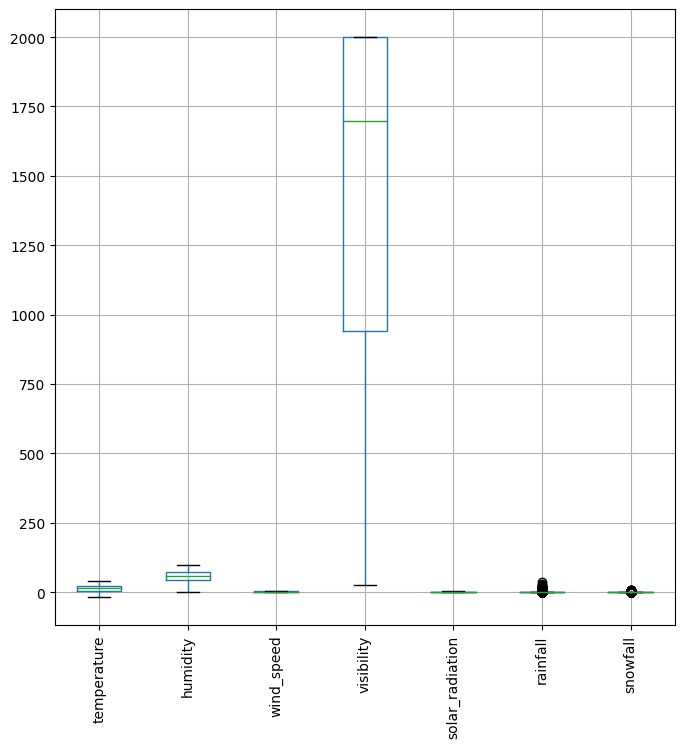

In [ ]:
plt.figure(figsize=(8,8))
bike_data[numerical_features].boxplot()
plt.xticks(rotation=90)

In [ ]:
numerical_features.remove('rainfall')
numerical_features.remove('snowfall')

Outliers were not removed from rainfall and snowfall column since it causes loss of information if it was treated further with function clip_outliers.

In [ ]:
# Treating the outliers
def clip_outliers(bike_data):
    for col in bike_data[numerical_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = bike_data[col].quantile(0.25)
        q3 = bike_data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        # replacing the outliers with upper and lower bound
        bike_data[col] = bike_data[col].clip(lower_bound, upper_bound)
    return bike_data

Function clip_outliers was created for removal of outliers

In [ ]:
bike_data[numerical_features]=clip_outliers(bike_data[numerical_features])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'rented_bike_count'),
  Text(2, 0, 'hour'),
  Text(3, 0, 'temperature'),
  Text(4, 0, 'humidity'),
  Text(5, 0, 'wind_speed'),
  Text(6, 0, 'visibility'),
  Text(7, 0, 'solar_radiation'),
  Text(8, 0, 'rainfall'),
  Text(9, 0, 'snowfall'),
  Text(10, 0, 'day'),
  Text(11, 0, 'month'),
  Text(12, 0, 'year')])

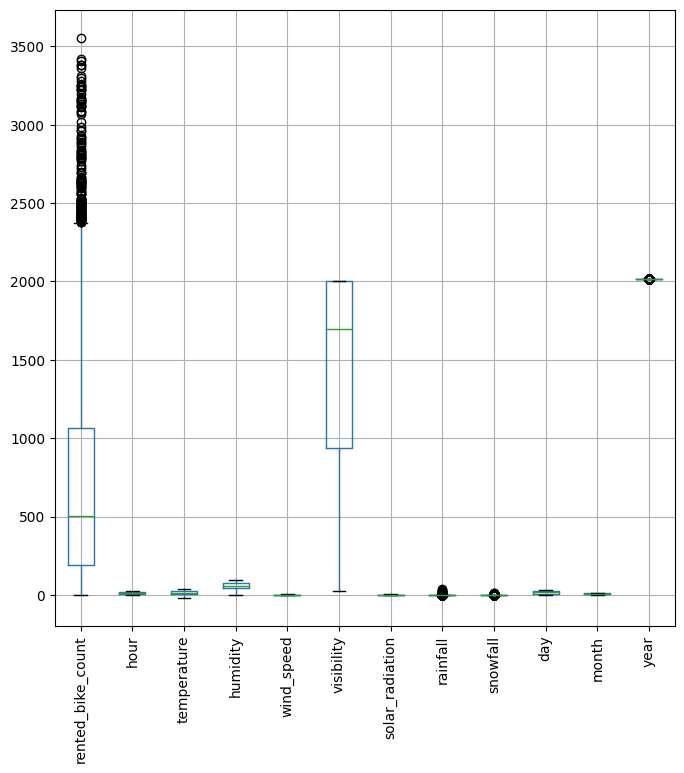

In [ ]:
plt.figure(figsize=(8,8))
bike_data.boxplot()
plt.xticks(rotation=90)

It is evident fron boxplot that there are no further more outliers.

## ***Exploratory data analysis***

## **Rented bike count**

In [ ]:
print(f'The maximum and minimum number of bikes rented are {bike_data.rented_bike_count.max()} and {bike_data.rented_bike_count.min()}')

The maximum and minimum number of bikes rented are 3556 and 0


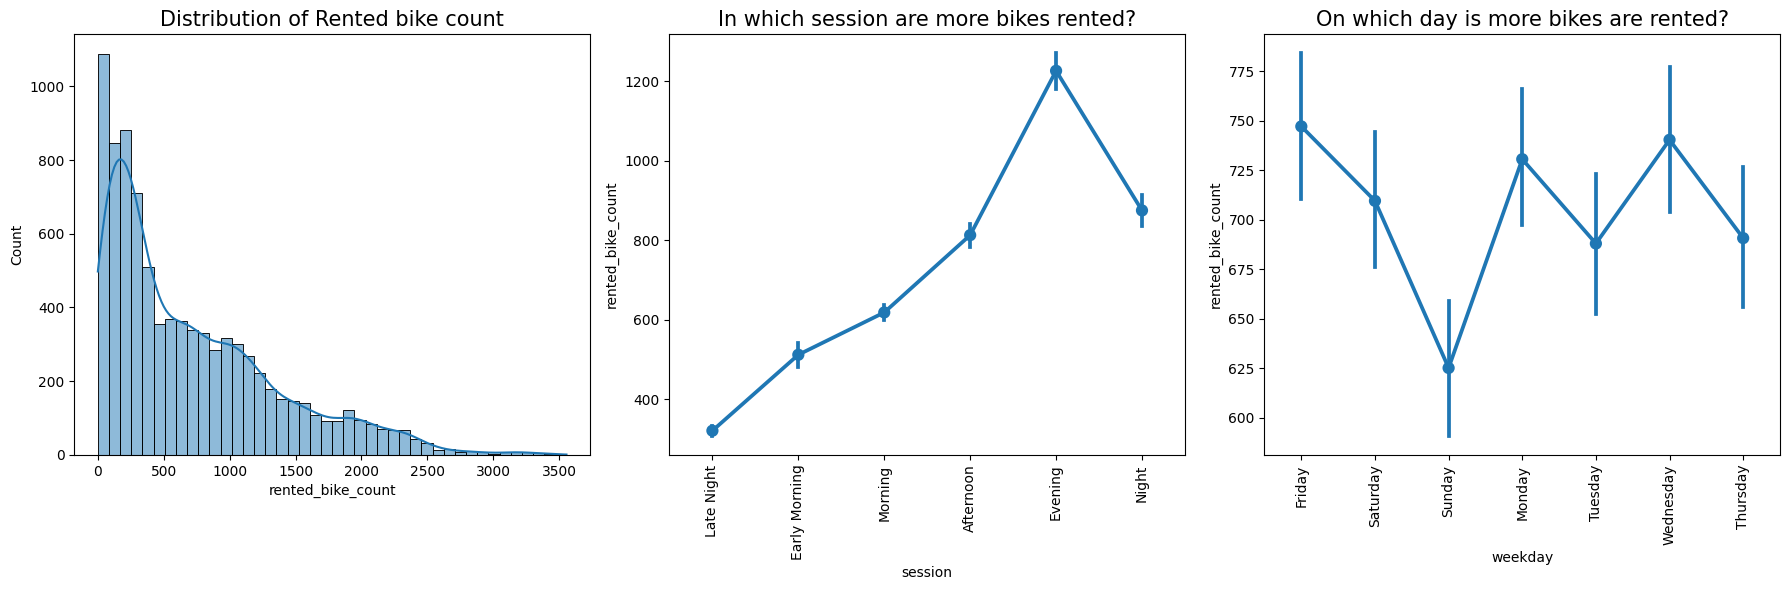

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(18,6))

hist_plot= sns.histplot(bike_data['rented_bike_count'],kde=True, ax=ax[0])
hist_plot.set_title('Distribution of Rented bike count', size=15)

point_plot = sns.pointplot( x='session', y='rented_bike_count',data=bike_data, ax=ax[1])
point_plot.set_title('In which session are more bikes rented?', size=15)
point_plot.set_xticklabels(point_plot.get_xticklabels(), rotation=90)


point_plot = sns.pointplot( x='weekday', y='rented_bike_count', data=bike_data,ax=ax[2])
point_plot.set_title('On which day is more bikes are rented?', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

It is evident from the distplot that rented_bike_count is positively skewed and bikes were rented more during evening session and during friday may be possibly because its the time of returm from their workplace. whereas, bikes were least rented during late night session and during sunday.

## **Column: Hour**

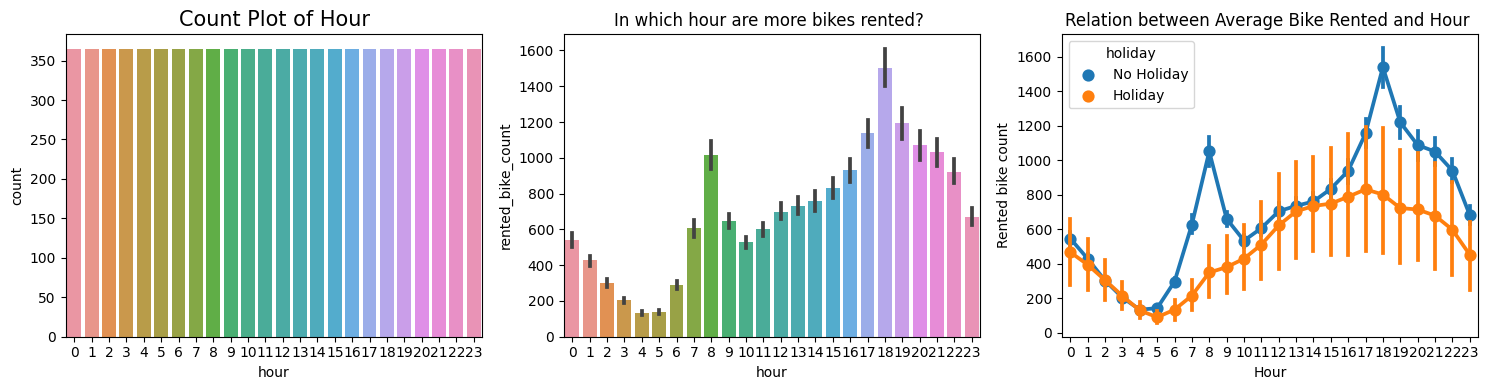

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

count_plot= sns.countplot( x='hour', data=bike_data, ax=ax[0])
count_plot.set_title('Count Plot of Hour', size=15)

bar_plot= sns.barplot( x='hour', y='rented_bike_count',data=bike_data, ax = ax[1])
bar_plot.set_title('In which hour are more bikes rented? ',size=12)
plt.xlabel('Hour')
plt.ylabel('Rented bike count')

point_plot= sns.pointplot( x='hour', y='rented_bike_count',data=bike_data, hue='holiday', ax= ax[2])
point_plot.set_title('Relation between Average Bike Rented and Hour ', size=12)
plt.xlabel('Hour')
plt.ylabel('Rented bike count')

plt.tight_layout()
plt.show()

It is evident from the figure that more number of bikes were rented during 6 pm i.e. evening session followed by morning session. Also it can be concluded that bikes were rented more during no holidays compared to holidays possibly as people will be using rental bikes to go and come for jobs.

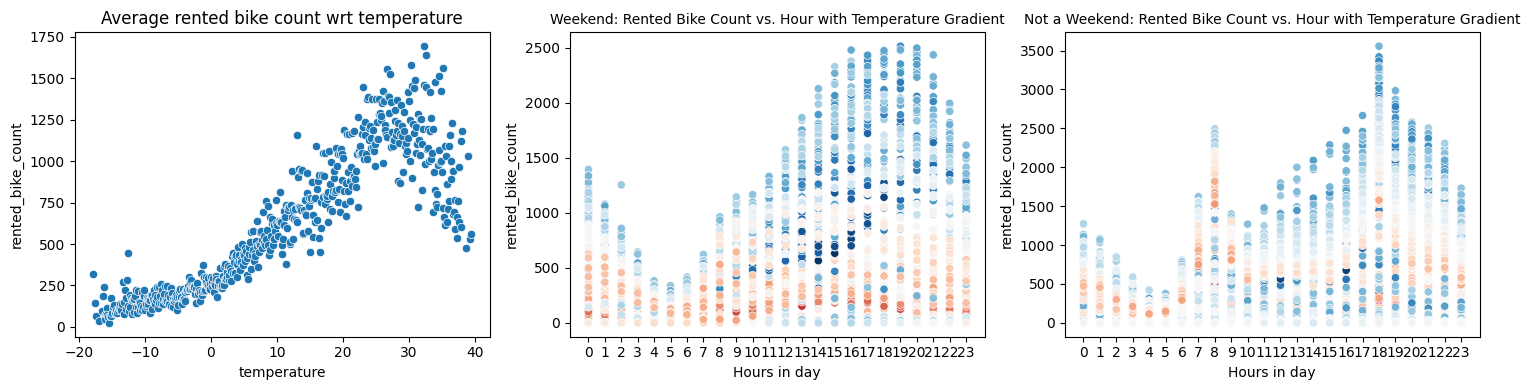

In [ ]:
fig, ax= plt.subplots(1,3,figsize=(15,4))

temp_rented_bike_count= bike_data.groupby(['temperature'])['rented_bike_count'].mean().reset_index()
scatter_plot = sns.scatterplot(x = 'temperature', y ='rented_bike_count', data = temp_rented_bike_count, ax = ax[0])
scatter_plot.set_title('Average rented bike count wrt temperature', size=12)

bike_data_nw = bike_data[(bike_data['weekday'] != 'Saturday') & (bike_data['weekday'] != 'Sunday')]
bike_data_w = bike_data[(bike_data['weekday'] == 'Saturday') | (bike_data['weekday'] == 'Sunday')]

scatter_plot = sns.scatterplot(x=bike_data_w['hour'], y=bike_data_w['rented_bike_count'], c=bike_data_w['temperature'], cmap="RdBu", ax =ax[1])
scatter_plot.set(xticks = range(24), xlabel='Hours in day', ylabel='rented_bike_count')
scatter_plot.set_title('Weekend: Rented Bike Count vs. Hour with Temperature Gradient', size=10)

scatter_plot = sns.scatterplot(x=bike_data_nw['hour'], y=bike_data_nw['rented_bike_count'], c=bike_data_nw['temperature'],cmap="RdBu", ax = ax[2])
scatter_plot.set(xticks = range(24), xlabel='Hours in day', ylabel='rented_bike_count')
scatter_plot.set_title('Not a Weekend: Rented Bike Count vs. Hour with Temperature Gradient',size= 10)

plt.tight_layout()
plt.show()


It is found that rental bikes count is more in case of weekend during afternoon to evening session but in case of weekdays it is particularly more during evening session as it may be the time for the return of people to their homes and hence more bikes are rented.   

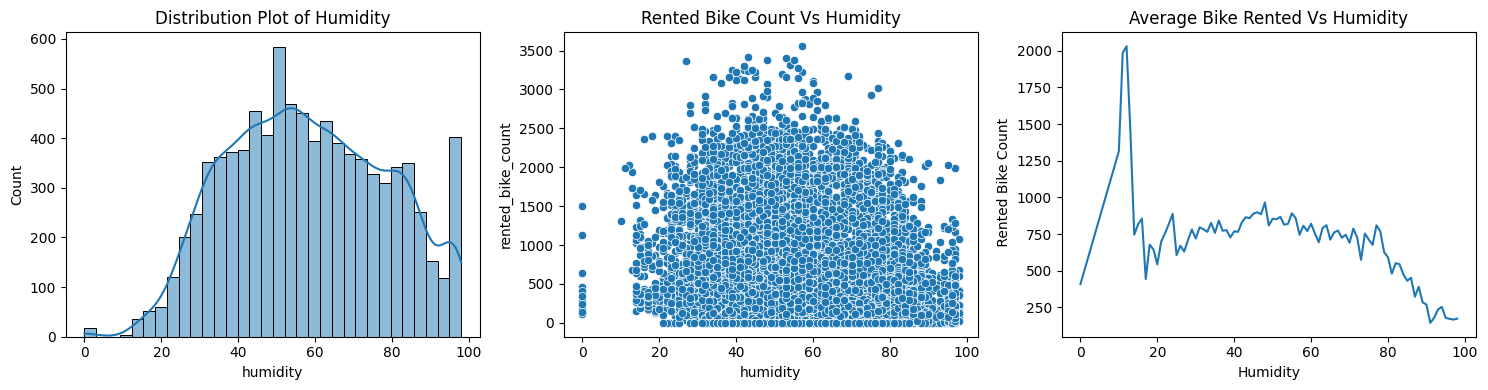

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

hist_plot = sns.histplot(bike_data['humidity'], kde=True, ax = ax[0])
hist_plot.set_title('Distribution Plot of Humidity')

scatter_plot = sns.scatterplot( x='humidity', y='rented_bike_count', data=bike_data,ax = ax[1])
scatter_plot.set(xlabel='humidity', ylabel='rented_bike_count', title='Rented Bike Count Vs Humidity')

group_wind_speed = bike_data.groupby(['humidity'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot( x='humidity', y = 'rented_bike_count', data=group_wind_speed,ax= ax[2])
line.set(xlabel='Humidity', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Humidity')

plt.tight_layout()
plt.show()


Distribution curve in this case is almost like a bell shaped curve. When there is optimum humidity level, the average bike rented was found to be high. As the humidity increases, the rental_bikes_count were found to decrease.

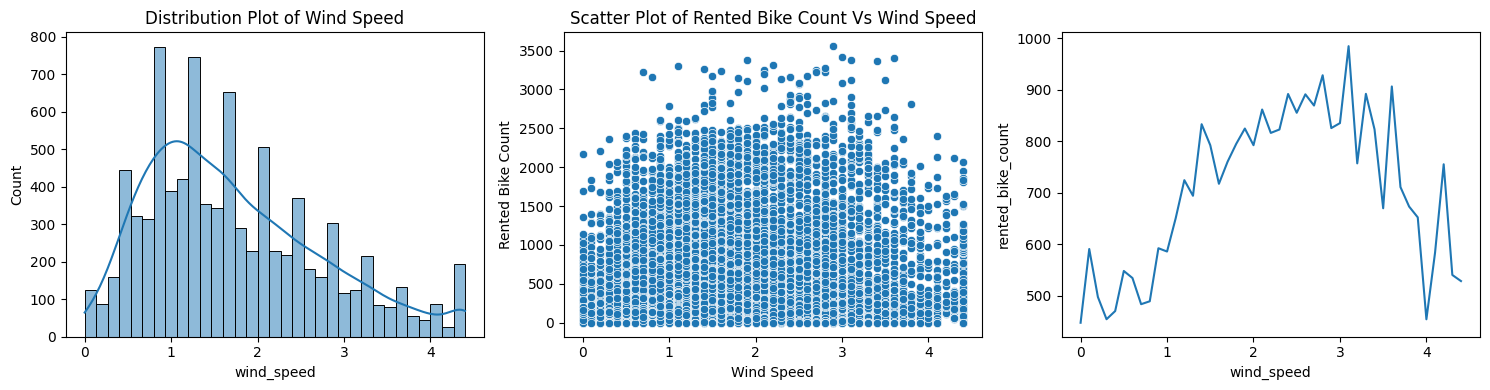

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

hist_plot = sns.histplot(bike_data['wind_speed'],kde=True,  ax = ax[0])
hist_plot.set_title('Distribution Plot of Wind Speed')

# Rented Bike Count Vs Wind Speed
scatter_plot = sns.scatterplot(x='wind_speed', y='rented_bike_count',data=bike_data, ax = ax[1])
scatter_plot.set(xlabel='Wind Speed', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Wind Speed')

group_wind_speed = bike_data.groupby(['wind_speed'])['rented_bike_count'].mean().reset_index()
line_plot = sns.lineplot(data=group_wind_speed, x='wind_speed', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Wind Speed', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Wind Speed')

plt.tight_layout()
plt.show()

Positively skewed distribution was obtained on using displot and it was found that maximum bikes were rented when the average wind speed ought to be in the range 2.8 to 3.1. Same is the case with windspeed that with the increase in widndspeed the rental_bike_count were found to decrease.

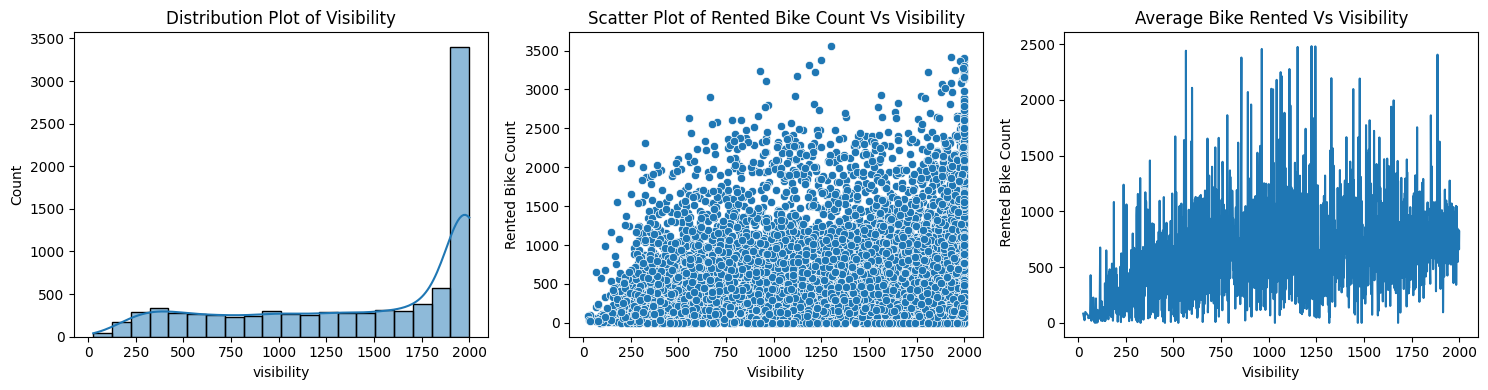

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
hist_plot = sns.histplot(bike_data.visibility, kde=True,ax = ax[0])
hist_plot.set_title('Distribution Plot of Visibility')

# Bi-variate analysis
# Rented Bike Count Vs Visibility
scatter_plot = sns.scatterplot( x='visibility', y='rented_bike_count',data=bike_data, ax = ax[1])
scatter_plot.set(xlabel='Visibility', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Visibility')

# Line Plot
group_visibility = bike_data.groupby(['visibility'])['rented_bike_count'].mean().reset_index()
line_plot = sns.lineplot(x='visibility', y = 'rented_bike_count', data=group_visibility, ax= ax[2])
line_plot.set(xlabel='Visibility', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Visibility')

plt.tight_layout()
plt.show()

Negatively skewed distribution was obtained for visibility.

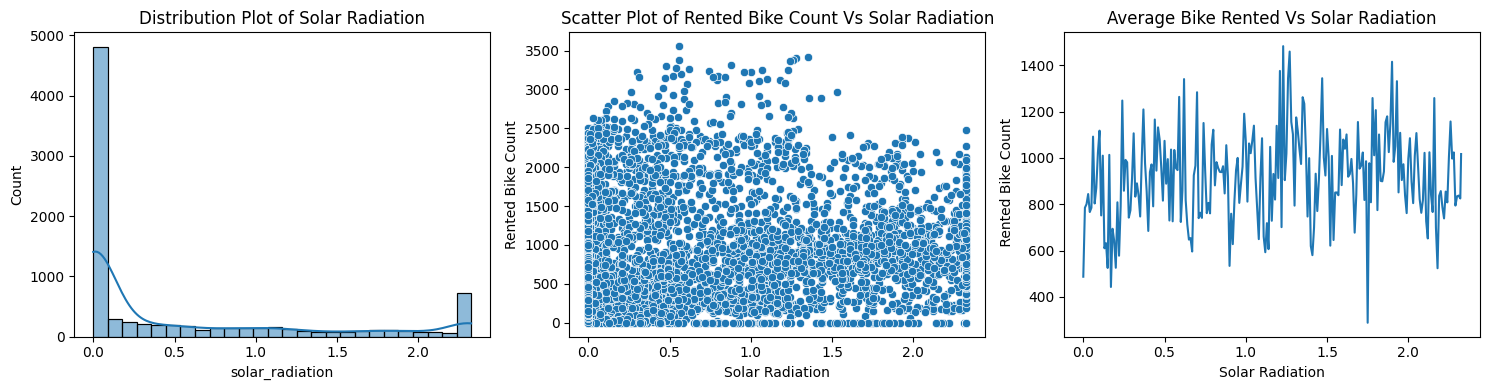

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
hist_plot = sns.histplot(bike_data['solar_radiation'],kde=True, ax = ax[0])
hist_plot.set_title('Distribution Plot of Solar Radiation')

# Bi-variate analysis
# Rented Bike Count Vs Solar Radiation
scatter_plot = sns.scatterplot( x='solar_radiation', y='rented_bike_count', data=bike_data, ax = ax[1])
scatter_plot.set(xlabel='Solar Radiation', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Solar Radiation')

# Line Plot
group_solar_radiation = bike_data.groupby(['solar_radiation'])['rented_bike_count'].mean().reset_index()
line_plot = sns.lineplot( x ='solar_radiation', y = 'rented_bike_count', data = group_solar_radiation, ax= ax[2])
line_plot.set(xlabel='Solar Radiation', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Solar Radiation')

plt.tight_layout()
plt.show()


Distribution plot was found to be positively skewed in case of solar radiation.

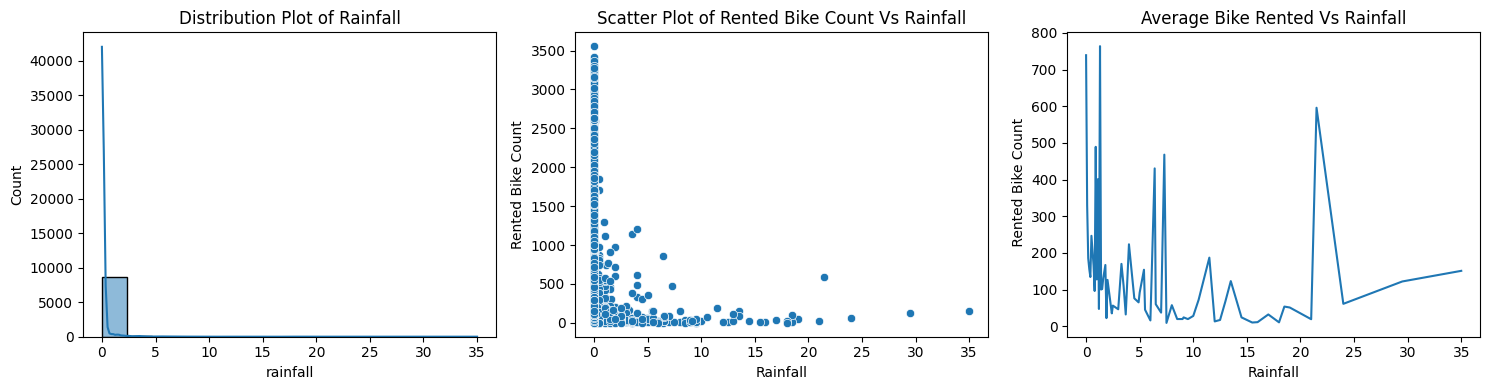

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
hist_plot = sns.histplot(bike_data['rainfall'],kde=True, ax = ax[0])
hist_plot.set_title('Distribution Plot of Rainfall')

# Bi-variate analysis
# Rented Bike Count Vs Rainfall
scatter_plot = sns.scatterplot( x='rainfall', y='rented_bike_count',data=bike_data, ax = ax[1])
scatter_plot.set(xlabel='Rainfall', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Rainfall')

# Line Plot
group_rainfall = bike_data.groupby(['rainfall'])['rented_bike_count'].mean().reset_index()
line_plot = sns.lineplot( x ='rainfall', y = 'rented_bike_count',data = group_rainfall, ax= ax[2])
line_plot.set(xlabel='Rainfall', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Rainfall')

plt.tight_layout()
plt.show()

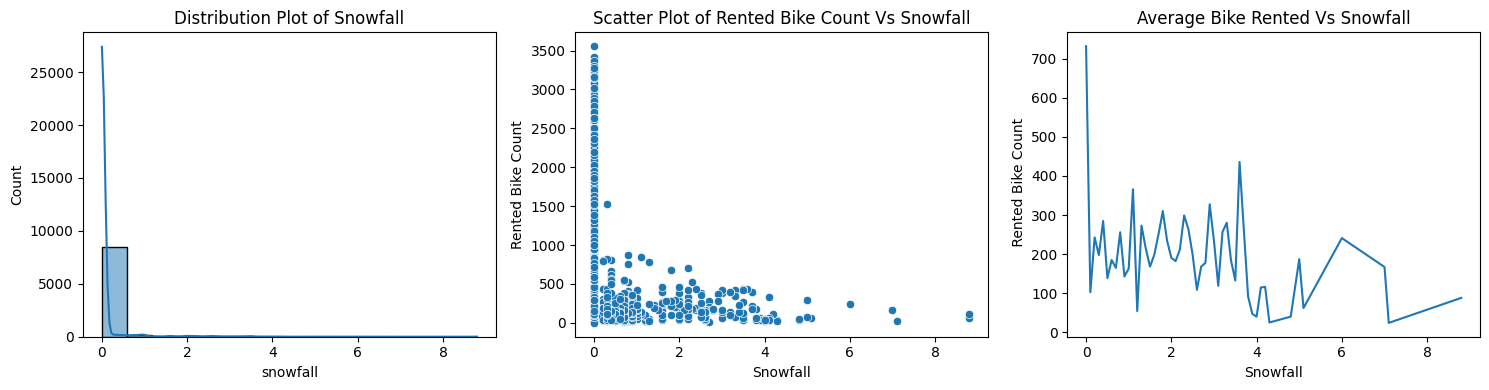

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
hist_plot = sns.histplot(bike_data.snowfall, kde=True, ax = ax[0])
hist_plot.set_title('Distribution Plot of Snowfall')

# Bi-variate analysis
# Rented Bike Count Vs Snowfall
scatter_plot = sns.scatterplot( x='snowfall', y='rented_bike_count',data=bike_data, ax = ax[1])
scatter_plot.set(xlabel='Snowfall', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Snowfall')

# Line Plot
group_snowfall = bike_data.groupby(['snowfall'])['rented_bike_count'].mean().reset_index()
line_plot = sns.lineplot(x ='snowfall', y = 'rented_bike_count',data = group_snowfall,  ax= ax[2])
line_plot.set(xlabel='Snowfall', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Snowfall')

plt.tight_layout()
plt.show()

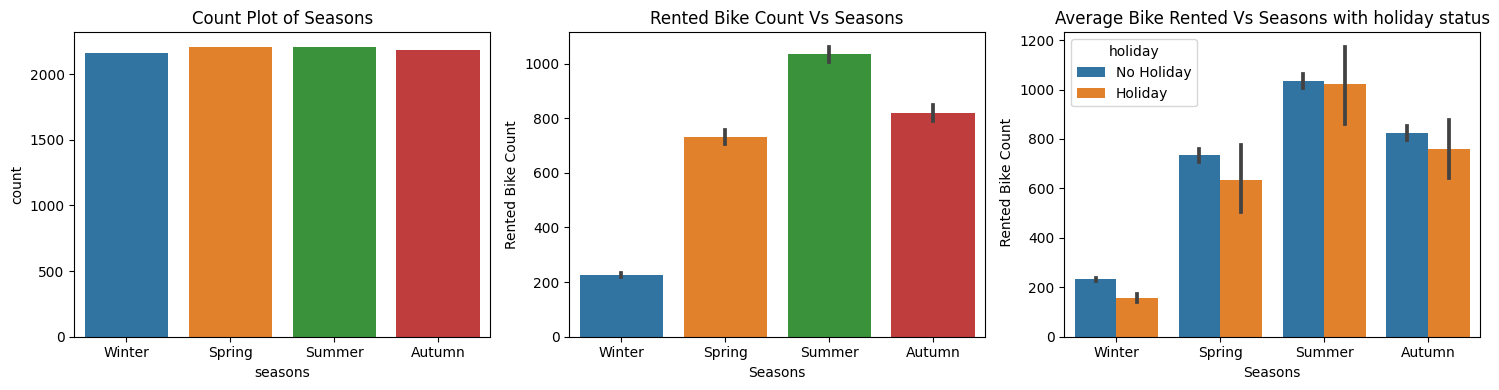

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
count_plot = sns.countplot( x='seasons', data=bike_data, ax=ax[0])
count_plot.set_title('Count Plot of Seasons')

# Bi-variate analysis
# Rented Bike Count Vs Seasons
bar_plot = sns.barplot( x='seasons', y='rented_bike_count',data=bike_data, ax = ax[1])
bar_plot.set(xlabel='Seasons', ylabel='Rented Bike Count', title='Rented Bike Count Vs Seasons')

# Multi-variate analysis
bar_plot = sns.barplot( x='seasons', y='rented_bike_count', data=bike_data, hue='holiday', ax= ax[2])
bar_plot.set(xlabel='Seasons', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Seasons with holiday status')

plt.tight_layout()
plt.show()


Bikes were more rented during summer followed by autumn and spring. Least numbe rof bikes were rented during winter season. It is also found that bikes were more rented during normal days i.e no holidays as rental bikes seems to be the mode of transportation to their respective workplace.

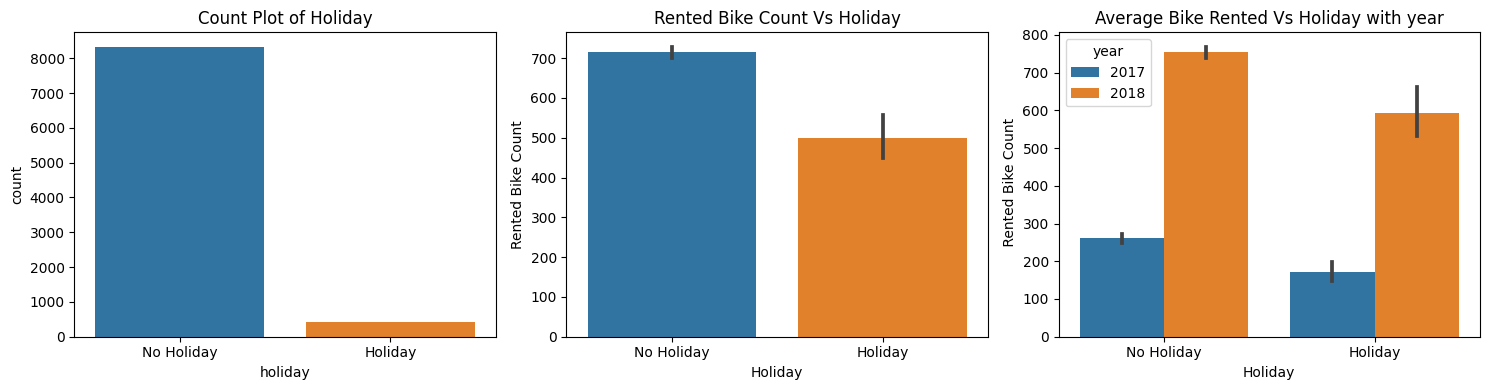

In [ ]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
count_plot = sns.countplot( x='holiday',data=bike_data, ax=ax[0])
count_plot.set_title('Count Plot of Holiday')

# Bi-variate analysis
# Rented Bike Count Vs Holiday
bar_plot = sns.barplot( x='holiday', y='rented_bike_count', data=bike_data,ax = ax[1])
bar_plot.set(xlabel='Holiday', ylabel='Rented Bike Count', title='Rented Bike Count Vs Holiday')

# Multi-variate analysis
bar_plot = sns.barplot( x='holiday', y='rented_bike_count',data=bike_data,hue='year', ax= ax[2])
bar_plot.set(xlabel='Holiday', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Holiday with year')

plt.tight_layout()
plt.show()

As mentioned earlier, bikes were more rented during no holidays i.e, normal weekdays however it was less rented during holidays. Also it was found that rental bikes count was found to be more in 2018 compared to 2017.

In [ ]:
bike_data.drop(['year','session','weekday'],axis=1,inplace=True)

In [ ]:
categorical_features.remove('year')
categorical_features.remove('weekday')
categorical_features.remove('session')

In [ ]:
# One-hot encoding the 'seasons' column
onehot_seasons = pd.get_dummies(bike_data['seasons'], prefix='season')
bike_data.drop('seasons', axis=1, inplace=True)
bike_data = pd.concat([bike_data, onehot_seasons], axis=1)

Hotlabel encoding was done for column seasons to get encoded as 0 and 1. New column was formed with prefix season.

In [ ]:
bike_data['holiday']=bike_data['holiday'].map({'Holiday':1,'No Holiday':0})
bike_data['functioning_day']=bike_data['functioning_day'].map({'Yes':1,'No':0})

Encoding of columns holiday and functioning_day was done with mapping type encoding assigning binary values to the column values.

In [ ]:
bike_data.head()

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,holiday,functioning_day,day,month,season_Autumn,season_Spring,season_Summer,season_Winter
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,1,12,0,0,0,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,1,12,0,0,0,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,1,12,0,0,0,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,1,12,0,0,0,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,1,12,0,0,0,1


<Axes: xlabel='rented_bike_count', ylabel='Count'>

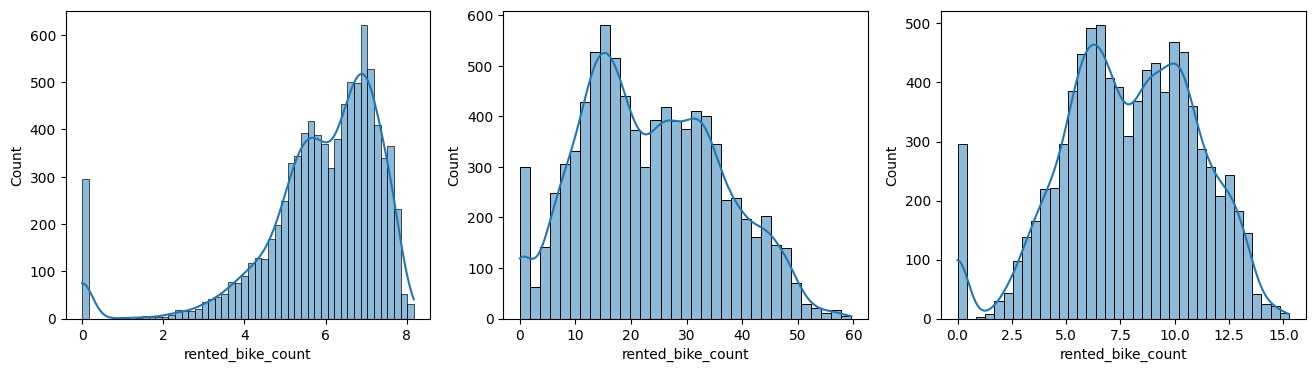

In [ ]:
# checking the best transformation for our target variable
fig, ax = plt.subplots(1,3, figsize=(16,4))

sns.histplot(np.log1p(bike_data['rented_bike_count']),kde=True, ax=ax[0])
sns.histplot(np.sqrt(bike_data['rented_bike_count']),kde=True, ax=ax[1])
sns.histplot(np.cbrt(bike_data['rented_bike_count']),kde=True, ax=ax[2])

Different types of transformation was applied for rented_bike_count and the best one was chosen. Square root transformation was found to be the best transformation since the the distribution plot is almost like normal type.

[Text(0.5, 0, 'Rented Bike Count'),
 Text(0, 0.5, 'Density'),
 Text(0.5, 1.0, 'Distribution Plot of Target Variable in sqrt tranformation')]

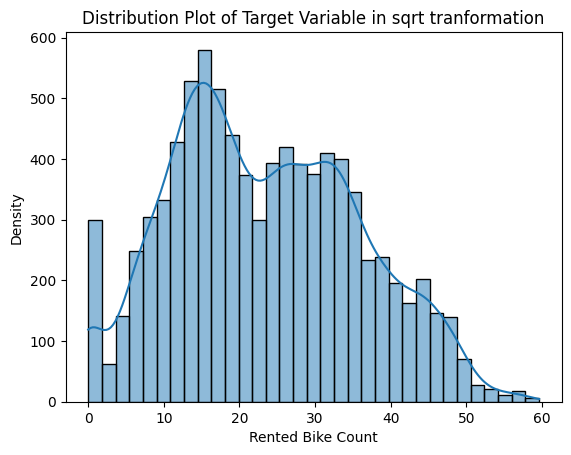

In [ ]:
#  checking square root tranformation in our target variable
hist_plot =sns.histplot(np.sqrt(bike_data['rented_bike_count']),kde=True)
hist_plot.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Target Variable in sqrt tranformation')


In [ ]:
x = bike_data.drop('rented_bike_count', axis=1)
y= np.sqrt(bike_data['rented_bike_count'])

rented_bike_count was chosed as a dependent variable i.e. label whereas other variables were chosen as independent variable for predicting the dependent variable.

In [ ]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)
print(x_train.shape)
print(x_test.shape)

(7008, 16)
(1752, 16)


Spliting of dataset into training and testing dataset was done in the ratio 80:20.

In [ ]:
# Scaling Data
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Standard scaler was used to normalize the dataset.

In [ ]:
# empty list for appending performance metric score
model_result = []

def predict(ml_algorithm,model_name):

  # model fitting
  model = ml_algorithm.fit(x_train,y_train)

  # predicting values
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)

  # graph --> best fit line on test data
  plt.figure(figsize=(5,5))
  sns.regplot(x=y_test_pred, y=y_test, line_kws={'color':'purple'})
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

  '''Evaluation metrics on train data'''
  train_MSE  = round(mean_squared_error(y_train, y_train_pred),3)
  train_RMSE = round(np.sqrt(train_MSE),3)
  train_r2 = round(r2_score(y_train, y_train_pred),3)
  train_MAE = round(mean_absolute_error(y_train, y_train_pred),3)
  train_adj_r2 = round(1-(1-r2_score(y_train, y_train_pred))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)),3)
  print(f'train MSE : {train_MSE}')
  print(f'train RMSE : {train_RMSE}')
  print(f'train MAE : {train_MAE}')
  print(f'train R2 : {train_r2}')
  print(f'train Adj R2 : {train_adj_r2}')
  print('-'*150)

  '''Evaluation metrics on test data'''
  test_MSE  = round(mean_squared_error(y_test, y_test_pred),3)
  test_RMSE = round(np.sqrt(test_MSE),3)
  test_r2 = round(r2_score(y_test, y_test_pred),3)
  test_MAE = round(mean_absolute_error(y_test, y_test_pred),3)
  test_adj_r2 = round(1-(1-r2_score(y_test, y_test_pred))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),3)
  print(f'test MSE : {test_MSE}')
  print(f'test RMSE : {test_RMSE}')
  print(f'test MAE : {test_MAE}')
  print(f'test R2 : {test_r2}')
  print(f'test Adj R2 : {test_adj_r2}')
  print('-'*150)

  # graph --> actual vs predicted on test data
  plt.figure(figsize=(5,5))
  plt.plot((y_test_pred)[:20])
  plt.plot(np.array((y_test)[:20]))
  plt.legend(["Predicted","Actual"])
  plt.xlabel('Test Data on last 20 points')
  plt.show()
  print('-'*150)

  '''actual vs predicted value on test data'''
  d = {'y_actual':y_test, 'y_predict':y_test_pred, 'error':y_test-y_test_pred}
  print(pd.DataFrame(data=d).head().T)
  print('-'*150)

  # using the score from the performance metrics to create the final model_result.
  model_result.append({'model':model_name,
                       'train MSE':train_MSE,
                       'test MSE':test_MSE,
                       'train RMSE':train_RMSE,
                       'test RMSE':test_RMSE,
                       'train MAE':train_MAE,
                       'test MAE':test_MAE,
                       'train R2':train_r2,
                       'test R2':test_r2,
                       'train Adj R2':train_adj_r2,
                       'test Adj R2':test_adj_r2})


The accuracy metrics in this case is MSE, RMSE, MAE, R2 and Adjusted R2 scores. Adjusted R2 score is found to be less than R2 score.

## **Linear regression**

train MSE : 54.055
train RMSE : 7.352
train MAE : 5.622
train R2 : 0.654
train Adj R2 : 0.653
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 53.215
test RMSE : 7.295
test MAE : 5.604
test R2 : 0.647
test Adj R2 : 0.644
------------------------------------------------------------------------------------------------------------------------------------------------------


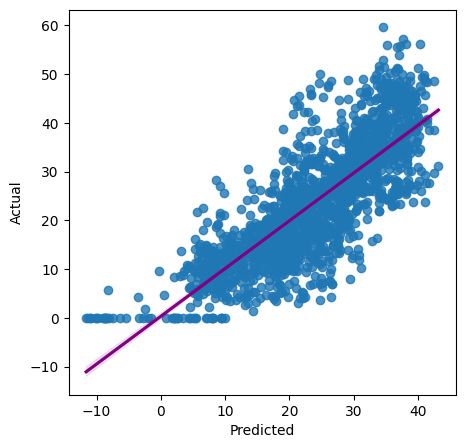

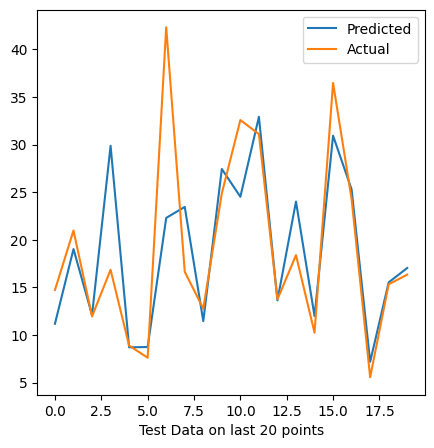

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  11.183141  19.025487  12.096540  29.865377  8.708305
error       3.547778   1.950690  -0.138279 -13.013078  0.179889
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(LinearRegression(), 'LinearRegression')

R2 score for training and testing data was found to be 0.654 and 0.647 respectively, whereas adjusted R2 score was found to be 0.653 and 0.644 respectively.

## **Lasso Regression**

train MSE : 54.006
train RMSE : 7.349
train MAE : 5.63
train R2 : 0.654
train Adj R2 : 0.653
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 53.007
test RMSE : 7.281
test MAE : 5.601
test R2 : 0.649
test Adj R2 : 0.645
------------------------------------------------------------------------------------------------------------------------------------------------------


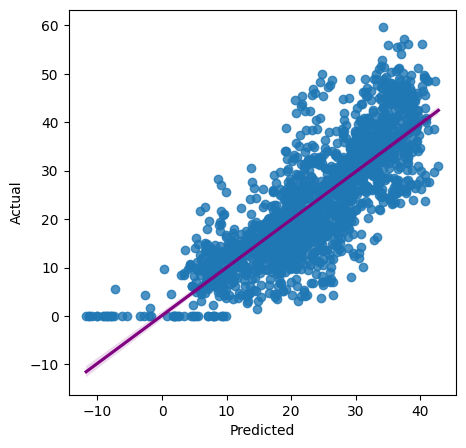

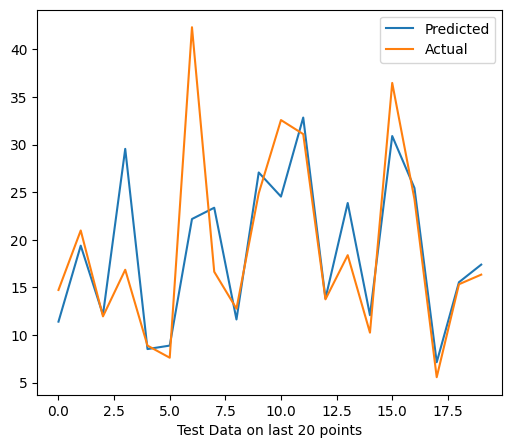

------------------------------------------------------------------------------------------------------------------------------------------------------
               1425       7993       897        5813      1708
y_actual   14.73092  20.976177  11.958261  16.852300  8.888194
y_predict  11.40344  19.383140  12.130404  29.547010  8.524600
error       3.32748   1.593037  -0.172143 -12.694711  0.363594
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(Lasso(alpha=0.01,max_iter=100),'LASSO')

Hyperparameter tuning was carried put with parameters like alpha and maximum iteration. R2 score for training and testing data was found to be 0.654 and 0.649 respectively, whereas adjusted R2 score was found to be 0.653 and 0.645 respectively.

## **Ridge regression**

R2 score for training and testing data was found to be 0.654 and 0.649 respectively, whereas adjusted R2 score was found to be 0.653 and 0.645 respectively.

train MSE : 54.005
train RMSE : 7.349
train MAE : 5.631
train R2 : 0.654
train Adj R2 : 0.653
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 52.998
test RMSE : 7.28
test MAE : 5.601
test R2 : 0.649
test Adj R2 : 0.645
------------------------------------------------------------------------------------------------------------------------------------------------------


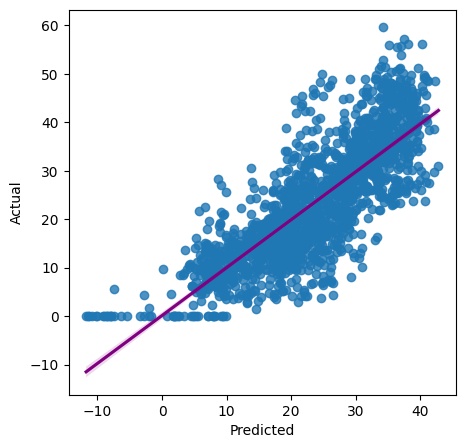

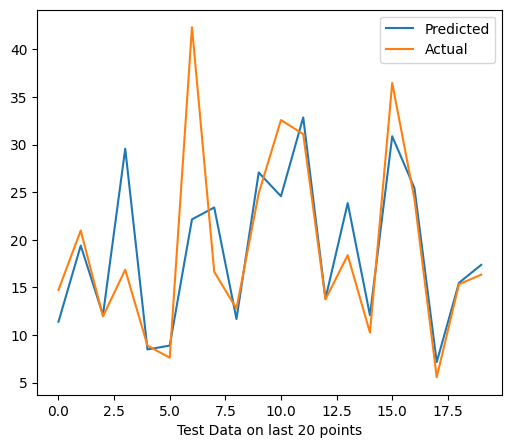

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897       5813      1708
y_actual   14.730920  20.976177  11.958261  16.85230  8.888194
y_predict  11.396747  19.387801  12.110689  29.56493  8.481346
error       3.334172   1.588376  -0.152428 -12.71263  0.406849
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(Ridge(alpha=10, max_iter=100),'RIDGE')

## **ElasticNet Regression**

train MSE : 54.463
train RMSE : 7.38
train MAE : 5.663
train R2 : 0.651
train Adj R2 : 0.65
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 53.814
test RMSE : 7.336
test MAE : 5.661
test R2 : 0.643
test Adj R2 : 0.64
------------------------------------------------------------------------------------------------------------------------------------------------------


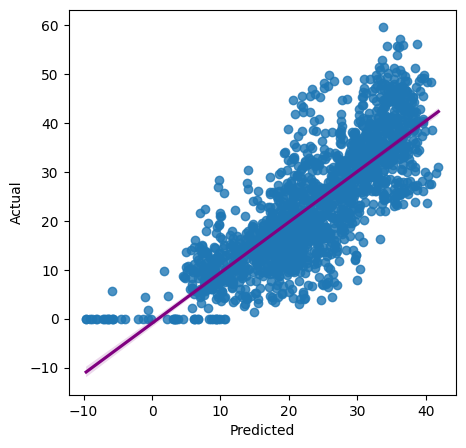

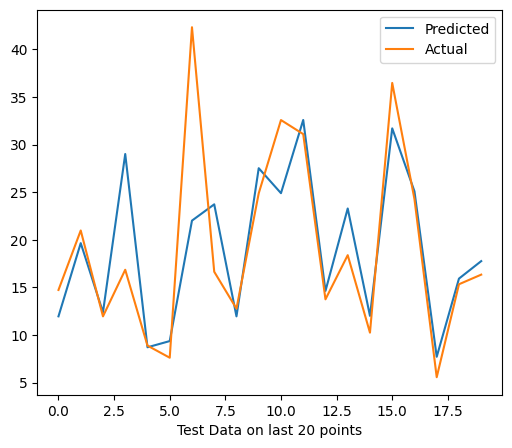

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  11.961095  19.647477  12.388840  29.006202  8.710924
error       2.769825   1.328700  -0.430579 -12.153902  0.177271
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(ElasticNet(alpha=0.1,max_iter=100),'ELASTICNET')

R2 score for training and testing data was found to be 0.651 and 0.643 respectively, whereas adjusted R2 score was found to be 0.65 and 0.64 respectively.

## **K-Nearest Neighbor**

train MSE : 15.274
train RMSE : 3.908
train MAE : 2.64
train R2 : 0.902
train Adj R2 : 0.902
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 26.413
test RMSE : 5.139
test MAE : 3.619
test R2 : 0.825
test Adj R2 : 0.823
------------------------------------------------------------------------------------------------------------------------------------------------------


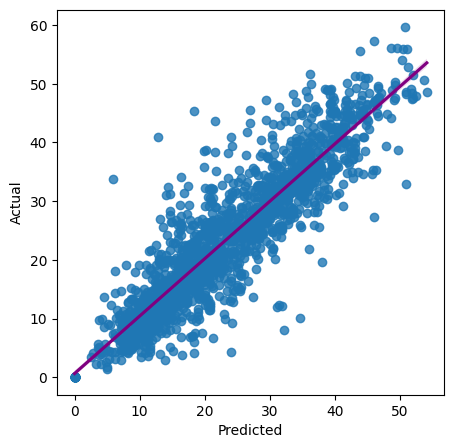

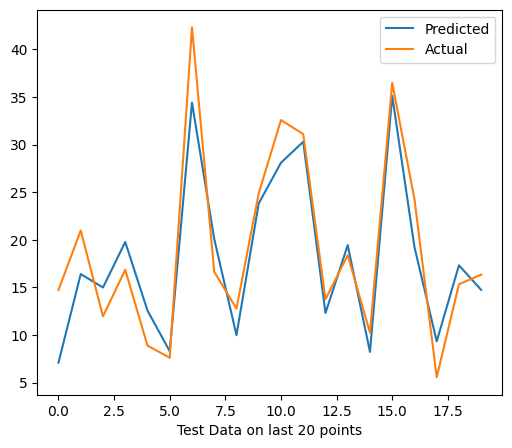

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813       1708
y_actual   14.730920  20.976177  11.958261  16.852300   8.888194
y_predict   7.098716  16.401239  14.989466  19.769974  12.571314
error       7.632204   4.574937  -3.031205  -2.917674  -3.683120
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(KNeighborsRegressor(n_neighbors=4), 'KNN')

Hyperparameter tuning was carried out with hyperparameters like number of nieghbors. R2 score for training and testing data was found to be 0.902 and 0.825 respectively, whereas adjusted R2 score was found to be 0.902 and 0.823 respectively.

## **Support Vector Regressor**

train MSE : 20.748
train RMSE : 4.555
train MAE : 2.703
train R2 : 0.867
train Adj R2 : 0.867
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 25.763
test RMSE : 5.076
test MAE : 3.313
test R2 : 0.829
test Adj R2 : 0.828
------------------------------------------------------------------------------------------------------------------------------------------------------


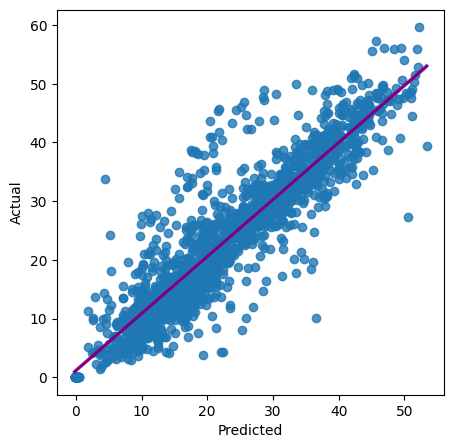

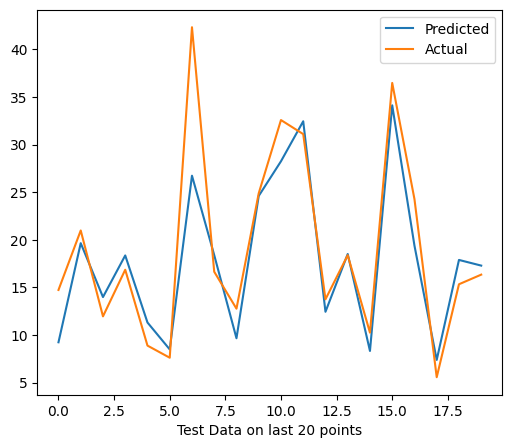

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813       1708
y_actual   14.730920  20.976177  11.958261  16.852300   8.888194
y_predict   9.236638  19.643827  13.985499  18.355363  11.313747
error       5.494281   1.332350  -2.027239  -1.503063  -2.425553
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(SVR(kernel='rbf',C=100),'SVR')

Radial basis function was set as kernel type with regulisation paramter equal to 100. R2 score for training and testing data was found to be 0.867 and 0.829respectively, whereas adjusted R2 score was found to be 0.867 and 0.828 respectively.

## **Decision Tree Regressor**

train MSE : 11.382
train RMSE : 3.374
train MAE : 2.285
train R2 : 0.927
train Adj R2 : 0.927
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 21.706
test RMSE : 4.659
test MAE : 3.161
test R2 : 0.856
test Adj R2 : 0.855
------------------------------------------------------------------------------------------------------------------------------------------------------


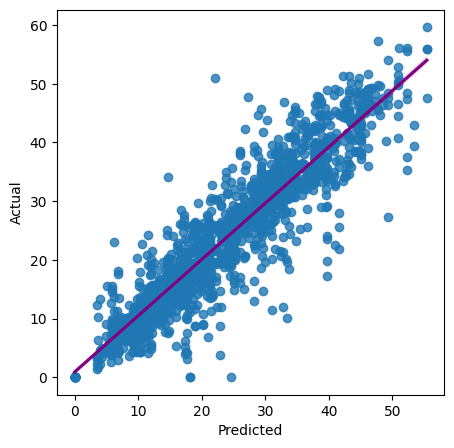

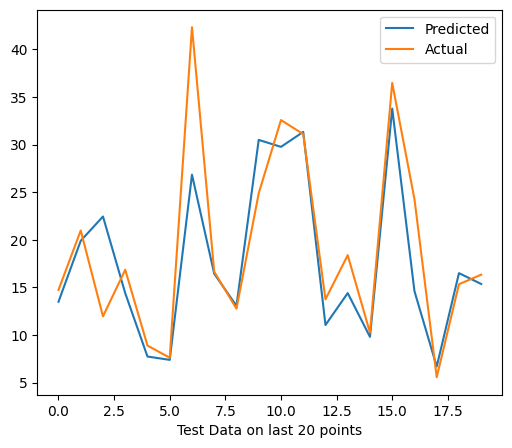

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  13.493207  19.894387  22.444584  14.395132  7.739533
error       1.237713   1.081790 -10.486323   2.457168  1.148661
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(DecisionTreeRegressor(min_samples_leaf=10, min_samples_split=3, max_features=20),'Decision Tree')

R2 score for training and testing data was found to be 0.927 and 0.856 respectively, whereas adjusted R2 score was found to be 0.927 and 0.855 respectively.

## **Random Forest Regressor**

In [ ]:
param_grid={'n_estimators':[50,80],'min_samples_split':[3,6],'min_samples_leaf':[10,20],'max_depth':[15,30]}
rf_model= RandomForestRegressor()

# Use GridSearchCV to perform a grid search over the parameter grid
grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5, scoring='r2')

In [ ]:
# Fit the model to the training data
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [15, 30], 'min_samples_leaf': [10, 20],
                         'min_samples_split': [3, 6],
                         'n_estimators': [50, 80]},
             scoring='r2')

In [ ]:
# Get the best parameters from the grid search
rf_optimal_model = grid_search.best_estimator_
rf_optimal_model

RandomForestRegressor(max_depth=15, min_samples_leaf=10, min_samples_split=6,
                      n_estimators=50)

train MSE : 10.827
train RMSE : 3.29
train MAE : 2.24
train R2 : 0.931
train Adj R2 : 0.93
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 15.884
test RMSE : 3.985
test MAE : 2.762
test R2 : 0.895
test Adj R2 : 0.894
------------------------------------------------------------------------------------------------------------------------------------------------------


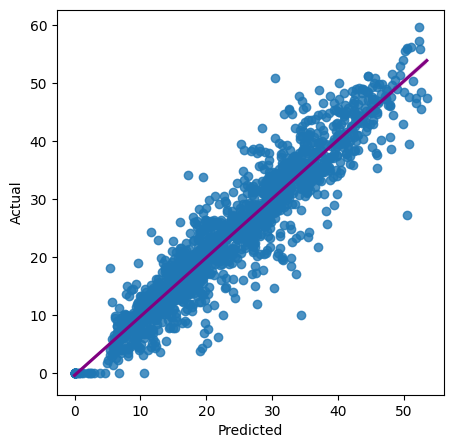

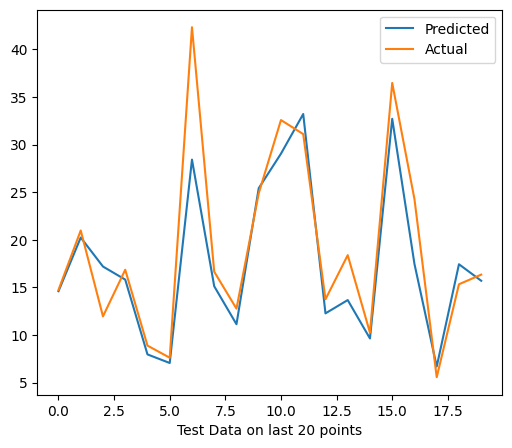

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  14.597384  20.236375  17.189876  15.817513  7.963997
error       0.133536   0.739802  -5.231615   1.034786  0.924197
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
predict(rf_optimal_model, 'Random Forest')

 Grid search was carried out with grid of parameters for selection of best model whuch serves for prediction. R2 score for training and testing data was found to be 0.931 and 0.930 respectively, whereas adjusted R2 score was found to be 0.93 and 0.89 respectively.

train MSE : 7.608
train RMSE : 2.758
train MAE : 2.279
train R2 : 0.951
train Adj R2 : 0.951
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 15.87
test RMSE : 3.984
test MAE : 2.907
test R2 : 0.895
test Adj R2 : 0.894
------------------------------------------------------------------------------------------------------------------------------------------------------


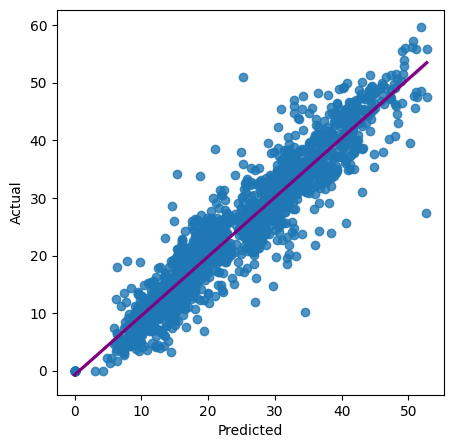

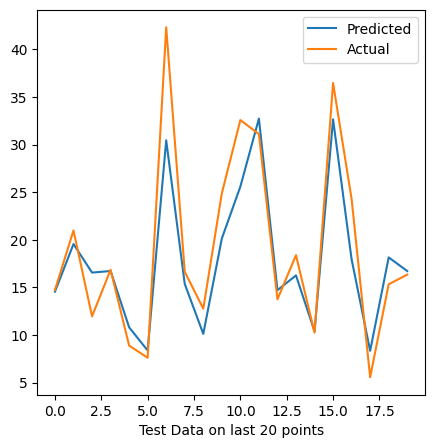

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813       1708
y_actual   14.730920  20.976177  11.958261  16.852300   8.888194
y_predict  14.553626  19.553013  16.553932  16.719931  10.807953
error       0.177294   1.423164  -4.595671   0.132369  -1.919759
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# Create a base decision tree regression model
decision_tree = DecisionTreeRegressor(max_depth=12,min_samples_split=5,min_samples_leaf=20)
ada = AdaBoostRegressor(base_estimator=decision_tree, n_estimators=60, learning_rate=1, random_state =33)
predict(ada, 'AdaBoost')

Hyperparameter tuning was carried out with parameters such as max_depth, min_samples_split and min_samples_leaf.R2 score for training and testing data was found to be 0.951 and 0.895 respectively, whereas adjusted R2 score was found to be 0.951 and 0.894 respectively.

train MSE : 16.741
train RMSE : 4.092
train MAE : 2.93
train R2 : 0.893
train Adj R2 : 0.892
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 18.217
test RMSE : 4.268
test MAE : 3.08
test R2 : 0.879
test Adj R2 : 0.878
------------------------------------------------------------------------------------------------------------------------------------------------------


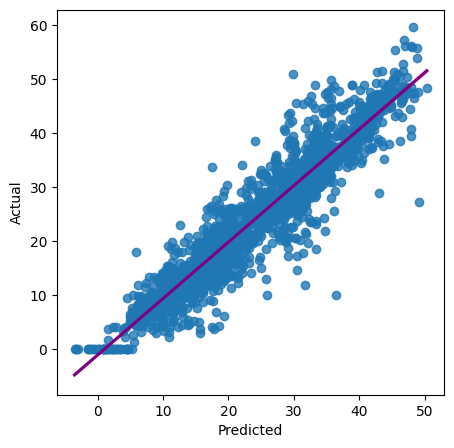

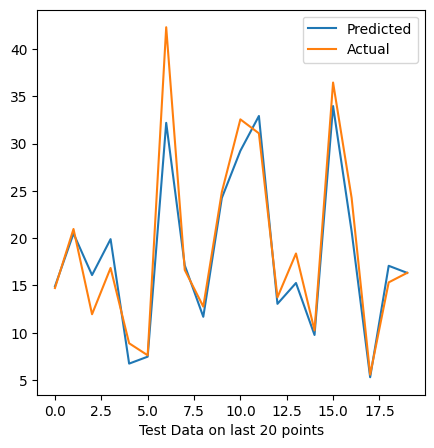

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  14.905305  20.499195  16.102962  19.903122  6.735111
error      -0.174385   0.476982  -4.144702  -3.050822  2.153083
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
predict(xgb_regressor, 'XGBregressor' )

Hyperparameter tuning was carried out with parameters such as n_estimators, learning_rate and max-depth. R2 score for training and testing data was found to be 0.893 and 0.879 respectively, whereas adjusted R2 score was found to be 0.892 and 0.878 respectively.

# **Conclusion**

The dataset was preprocessed for detection of missing values and outliers in which no such values were found. Nextly by explorartory data analysis various conclusions can be made. Bikes were more rented during office hours i.e during morning session and evening session. With the increase in rainfall, snowfall and windspeed the rental bike count was found to decrease. Bikes were more rented during normal weekdays compared to weekends and also Bikes were more rented during summer followed by autumn and spring. Least number of bikes were rented during winter season. Yearby year the rental count is increasing as in the case of 2018 compared to 2017 hence there is an oppurtunity for rental bike services.  Some algorithms like Random forest and Adaboost regressor were performing well with least RMSE and high accuracy scores. As future line of work it can be extended to other algorithms as well and with proper gid search on hyperparameter tuning.  